https://www.tandfonline.com/doi/abs/10.13182/FST95-A30485

## Model for Tritium Extraction from Pb-17Li by Bubble Columns

Total tritium in [T/s]: 7.030438895476522e+20
Total tritium out [T/s]: 7.030216137040896e+20
extraction_efficiency [%]: 8.94732341884399
c_T_inlet [mol/m^3]: 0.0196
c_T_outlet [mol/m^3]: 0.017846324609906577
liquid_vol_flow [m^3/s]: 0.05956284921080261
P_T2_inlet_gas [Pa]: 5e-15
P_T2_outlet_gas [Pa]: 64.40477467833621
gas_vol_flow [m^3/s]: 0.001968365880221598
total_gas_P_outlet [Pa]: 234385.53864713883
rho_l: 9401.83365
sigma_l: 0.45147000000000004
mu_l: 0.00176914527844913
nu_l: 1.881702383076231e-07
K_s: 0.0009707892957239487
Q_l: 0.05956284921080261
Q_g: 0.001968365880221598
u_l: 0.3033511000491659
u_g0: 0.010024805108822301
epsilon_g: 0.040049384145852976
epsilon_l: 0.959950615854147
E_l: 0.09255841462441085
E_g: 0.0005012402554411151
a: 92.11452377315699
h_l: 0.00015828262183913326
Bo_l: 10.242407018557989
phi_l: 0.14419062594381926
Bo_g: 1498.1503780804794
phi_g: 0.0004429808642362574
psi: 0.5312289227057223
nu: 0.0008152525771960768


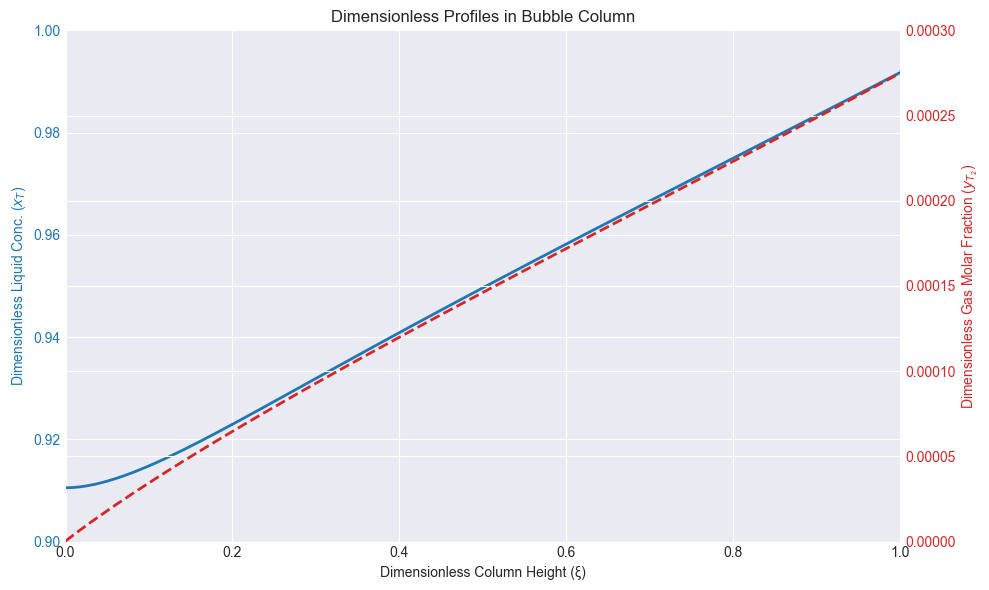

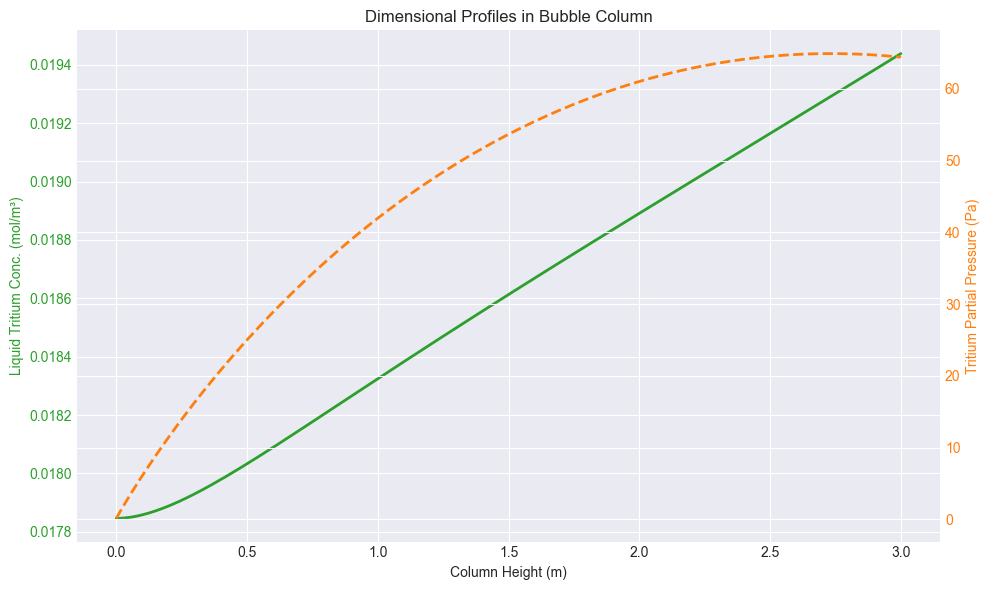

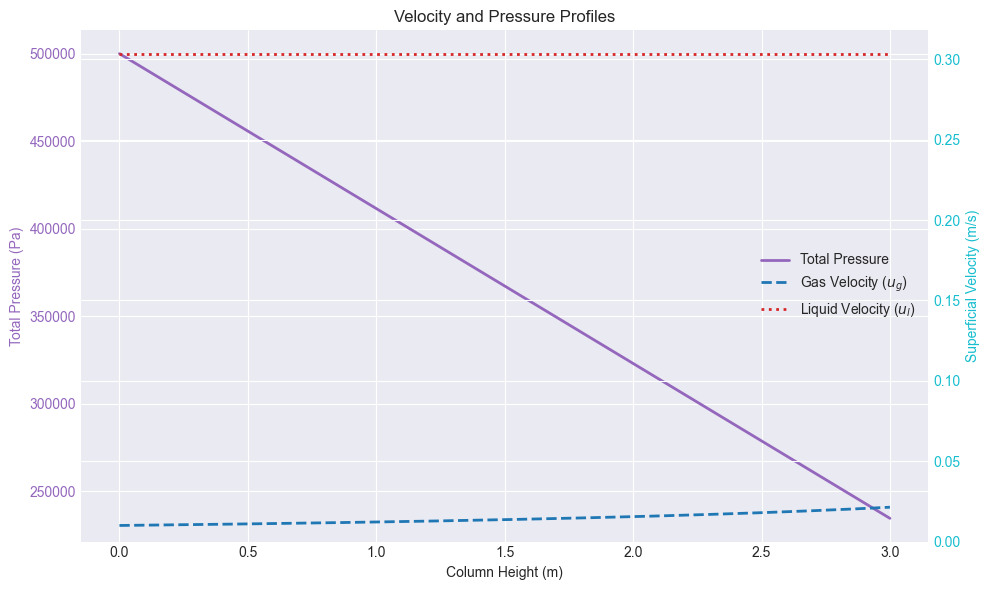

In [ ]:
"""
Bubble Column Gas-Liquid Contactor Model Runner

This script configures and runs a bubble column Pb-17Li gas-liquid contactor simulation of Tritium extraction,
using specified operating parameters and boundary conditions.
"""

import bubble_col_glc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Operating Parameters
# ------------------
# Input parameters for liquid phase
c_T_inlet = 1.96e-2  # mol/m^3 (c_T(L+)), Inlet tritium concentration in liquid

# Input parameters for gas phase
y_T2_in = 0  # Inlet tritium molar fraction in gas (0 = pure purge gas)

# Physical parameters
P_0 = 5e5        # Pa, Total pressure at gas inlet / liquid outlet
L = 3            # m, Height of the bubble column
D = 0.5          # m, Column diameter
Flow_l = 560     # kg/s, Liquid mass flow rate
Flow_g = 0.19    # mol/s, Gas molar flow rate
T = 623          # K, Temperature

# Solver parameters
BCs = "C-C"      # Boundary conditions: "O-C" (Open-Closed) or "C-C" (Closed-Closed)
elements = 50    # Number of initial mesh elements for solver

# Package parameters for solver
params = {
    "c_T_inlet": c_T_inlet,
    "y_T2_in": y_T2_in,
    "P_0": P_0,
    "BCs": BCs,
    "L": L,
    "D": D,
    "Flow_l": Flow_l,
    "Flow_g": Flow_g,
    "T": T,
    "elements": elements,
}

# Run simulation
[results, solution] = bubble_col_glc.solve(params)

# Print results
for key, value in results.items():
    print(f"{key}: {value}")



# --- Rebuild parameters for visualization ---

# Extract necessary parameters from results for plotting
dimensionless_params = {
    'psi': results['psi'],
}
u_g0 = results['u_g0']
u_l = results['u_l']


# --- Visualization of Results ---

# --- Plot 1: Dimensionless Profiles ---
plt.style.use('seaborn-v0_8-darkgrid')
fig1, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Dimensionless Column Height (ξ)')
ax1.set_ylabel('Dimensionless Liquid Conc. ($x_T$)', color=color)
ax1.plot(solution.x, solution.y[0], label='$x_T$ (Liquid)', color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0.9, top=1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Dimensionless Gas Molar Fraction ($y_{T_2}$)', color=color)
ax2.plot(solution.x, solution.y[2], label='$y_{T_2}$ (Gas)', color=color, ls='--', lw=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=3e-4)
ax2.set_xlim(left=0, right=1)

plt.title('Dimensionless Profiles in Bubble Column')
fig1.tight_layout()
        
# --- Plot 2: Dimensional Profiles ---
# Calculate dimensional profiles along the column
c_T_profile = solution.y[0] * c_T_inlet
P_total_profile = P_0 * (1 - dimensionless_params['psi'] * solution.x)
P_T2_profile = solution.y[2] * P_total_profile
col_height = solution.x * L
        
fig2, ax3 = plt.subplots(figsize=(10, 6))

color = 'tab:green'
ax3.set_xlabel('Column Height (m)')
ax3.set_ylabel('Liquid Tritium Conc. (mol/m³)', color=color)
ax3.plot(col_height, c_T_profile, label='Liquid Conc.', color=color, lw=2)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()
color = 'tab:orange'
ax4.set_ylabel('Tritium Partial Pressure (Pa)', color=color)
ax4.plot(col_height, P_T2_profile, label='Tritium Pressure', color=color, ls='--', lw=2)
ax4.tick_params(axis='y', labelcolor=color)

plt.title('Dimensional Profiles in Bubble Column')
fig2.tight_layout()

# --- Plot 3: Velocity and Pressure Profiles ---
# Calculate velocity and pressure profiles
u_g_profile = u_g0 / (1 - dimensionless_params['psi'] * solution.x)
u_l_profile = np.full_like(col_height, u_l)
# P_total_profile is already calculated for Plot 2

fig3, ax5 = plt.subplots(figsize=(10, 6))

color = 'tab:purple'
ax5.set_xlabel('Column Height (m)')
ax5.set_ylabel('Total Pressure (Pa)', color=color)
ax5.plot(col_height, P_total_profile, label='Total Pressure', color=color, lw=2)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax5.twinx()
color = 'tab:cyan'
ax6.set_ylabel('Superficial Velocity (m/s)', color=color)
ax6.plot(col_height, u_g_profile, label='Gas Velocity ($u_g$)', color='tab:blue', ls='--', lw=2)
ax6.plot(col_height, u_l_profile, label='Liquid Velocity ($u_l$)', color='tab:red', ls=':', lw=2)
ax6.tick_params(axis='y', labelcolor=color)
ax6.set_ylim(bottom=0)

plt.title('Velocity and Pressure Profiles')
# Combine legends from both y-axes
lines, labels = ax5.get_legend_handles_labels()
lines2, labels2 = ax6.get_legend_handles_labels()
ax6.legend(lines + lines2, labels + labels2, loc='best')
fig3.tight_layout()


# Compare with results from Mohan paper

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\vk9746\AppData\Local\Temp\ipykernel_17428\2848408190.py:3: SyntaxWarning: invalid escape sequence '\M'
  Mohan_xT = pd.read_csv('Mohan_results\Mohan_CC_xT.csv')
C:\Users\vk9746\AppData\Local\Temp\ipykernel_17428\2848408190.py:4: SyntaxWarning: invalid escape sequence '\M'
  Mohan_yT2 = pd.read_csv('Mohan_results\Mohan_CC_yT2.csv')
C:\Users\vk9746\AppData\Local\Temp\ipykernel_17428\2848408190.py:6: SyntaxWarning: invalid escape sequence '\M'
  Mohan_xT = pd.read_csv('Mohan_results\Mohan_OC_xT.csv')
C:\Users\vk9746\AppData\Local\Temp\ipykernel_17428\2848408190.py:7: SyntaxWarning: inval

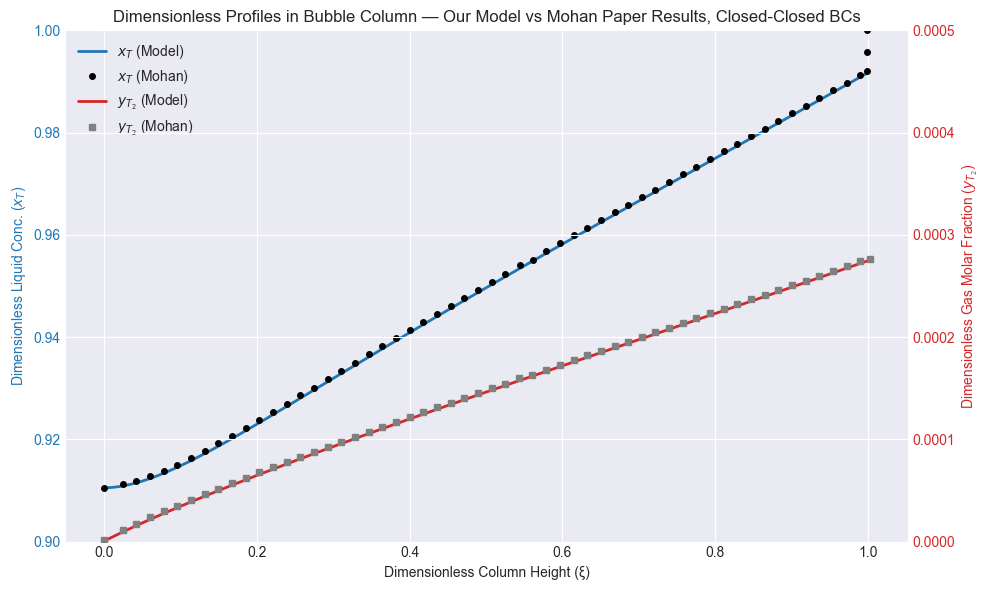

In [ ]:
# The Mohan paper uses parameters:

# c_T_inlet = 1.96e-2  # mol/m^3 (c_T(L+)), Inlet tritium concentration in liquid
# y_T2_in = 0      # Inlet tritium molar fraction in gas (0 = pure purge gas)
# P_0 = 5e5        # Pa, Total pressure at gas inlet / liquid outlet
# L = 3            # m, Height of the bubble column
# D = 0.5          # m, Column diameter
# Flow_l = 560     # kg/s, Liquid mass flow rate
# Flow_g = 0.19    # mol/s, Gas molar flow rate
# T = 623          # K, Temperature


# --- Import Mohan paper results for comparison ---
if BCs == "C-C":
    Mohan_xT = pd.read_csv('Mohan_results\Mohan_CC_xT.csv')
    Mohan_yT2 = pd.read_csv('Mohan_results\Mohan_CC_yT2.csv')
elif BCs == "O-C":
    Mohan_xT = pd.read_csv('Mohan_results\Mohan_OC_xT.csv')
    Mohan_yT2 = pd.read_csv('Mohan_results\Mohan_OC_yT2.csv')

# --- Plot comparison of our model vs Mohan paper dimensionless results ---

plt.style.use('seaborn-v0_8-darkgrid')
fig1, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Dimensionless Column Height (ξ)')
ax1.set_ylabel('Dimensionless Liquid Conc. ($x_T$)', color=color)
ax1.plot(solution.x, solution.y[0], label='$x_T$ (Model)', color=color, lw=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0.9, top=1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Dimensionless Gas Molar Fraction ($y_{T_2}$)', color=color)
ax2.plot(solution.x, solution.y[2], label='$y_{T_2}$ (Model)', color=color, lw=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(bottom=0, top=5e-4)

# plot Mohan xT on primary axis
ax1.plot(Mohan_xT.iloc[:,0], Mohan_xT.iloc[:,1], label='$x_T$ (Mohan)', color='black', marker='o', ls='None', ms=4)
# plot Mohan yT2 on secondary axis
ax2.plot(Mohan_yT2.iloc[:,0], Mohan_yT2.iloc[:,1], label='$y_{T_2}$ (Mohan)', color='gray', marker='s', ls='None', ms=4)

# --- Combined legend from both axes ---
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='best', ncol=1, framealpha=0.9)

if BCs == "C-C":
    plt.title('Dimensionless Profiles in Bubble Column — Our Model vs Mohan Paper Results, Closed-Closed BCs')
elif BCs == "O-C":  
    plt.title('Dimensionless Profiles in Bubble Column — Our Model vs Mohan Paper Results, Open-Closed BCs')

fig1.tight_layout()

# export figure
if BCs == "C-C":
    fig1.savefig('Mohan_comparison_CC.png', dpi=300)
elif BCs == "O-C":  
    fig1.savefig('Mohan_comparison_OC.png', dpi=300)